In [1]:
import torch
import math
device = 'cuda:6' if torch.cuda.is_available() else 'cpu'
from efficient_gp.gp import ONGP
from efficient_gp.gp_population import GPPopulation
from efficient_gp.sum_gp import KernelSumGP

In [2]:
from math import pi
import matplotlib.pyplot as plt
def f(x):
    return (torch.sin(4*pi*x+x)+x**2).sum(dim=-1)

In [3]:
torch.manual_seed(0)
train_x = torch.rand(25,1, dtype=torch.float32).view(-1,1)
train_y = f(train_x)
test_x = torch.linspace(0,1,101, dtype=torch.float32).view(-1,1)
test_y = f(test_x)

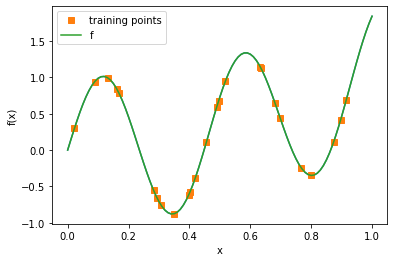

In [4]:
xlin = torch.linspace(0,1,101, dtype=torch.float32).view(-1,1)
plt.plot(xlin, f(xlin))
plt.plot(train_x, train_y,'s', label="training points")
plt.plot(test_x, test_y, label='f')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

In [5]:
# Experiments!
torch.manual_seed(0)
test_y_cuda = test_y.to(device=device)

print("A single GP, no weight optimization (uniform weights):")
gp = ONGP(train_x.to(dtype=torch.float64),
          train_y.to(dtype=torch.float64),
          test_x.to(dtype=torch.float64), lambd=1e-4, precision=32)
gp.random_bit_order()
gp.process()
print("Train nll:", gp.nll)
print("Test nll:", gp.calculate_test_nll(test_y))
print("Test rmse:", gp.rmse(test_y))
print()
print("Training the weight vector and the bit order:")
for _ in range(5):
    gp.update_weights(update_order=True, verbose=True)
    gp.save()
    print("Test nll:", gp.calculate_test_nll(test_y))
    print("Test rmse:", gp.rmse(test_y))

A single GP, no weight optimization (uniform weights):
Train nll: tensor(1.1065, dtype=torch.float64)
Test nll: tensor(1.0993, dtype=torch.float64)
Test rmse: tensor(0.6309, dtype=torch.float64)

Training the weight vector and the bit order:
train nll: tensor(1.1014, dtype=torch.float64)
train nll: tensor(1.0958, dtype=torch.float64)
train nll: tensor(1.0889, dtype=torch.float64)
train nll: tensor(1.0803, dtype=torch.float64)
train nll: tensor(1.0693, dtype=torch.float64)
train nll: tensor(1.0551, dtype=torch.float64)
train nll: tensor(1.0359, dtype=torch.float64)
train nll: tensor(1.0088, dtype=torch.float64)
train nll: tensor(0.9681, dtype=torch.float64)
train nll: tensor(0.8994, dtype=torch.float64)
train nll: tensor(0.7473, dtype=torch.float64)
train nll: tensor(0.4674, dtype=torch.float64)
train nll: tensor(0.4491, dtype=torch.float64)
train nll: tensor(0.4402, dtype=torch.float64)
train nll: tensor(0.4301, dtype=torch.float64)
train nll: tensor(0.4184, dtype=torch.float64)
train 

/home/sdaulton/anaconda3/envs/effgp/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Test nll: tensor(-0.1316, dtype=torch.float64)
Test rmse: tensor(0.3883, dtype=torch.float64)
train nll: tensor(0.3784, dtype=torch.float64)
train nll: tensor(0.3782, dtype=torch.float64)
train nll: tensor(0.3784, dtype=torch.float64)
nll increased; revert
train nll: tensor(0.3782, dtype=torch.float64)
bit order: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
Test nll: tensor(-0.1311, dtype=torch.float64)
Test rmse: tensor(0.3887, dtype=torch.float64)
lr 0.005
train nll: tensor(0.3781, dtype=torch.float64)
bit order: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
Test nll: tensor(-0.1314, dtype=torch.float64)
Test rmse: tensor(0.3884, dtype=torch.float64)
train nll: tensor(0.3779, dtype=torch.float64)
train nll: tensor(0.3778, dtype=torch.float64)
train nll: tensor(0.3779, dtype=torch.float64)
nll increased; revert
train nll: tensor(0.3778, dtype=torch.flo

In [6]:
# Experiments!
torch.manual_seed(0)
test_y_cuda = test_y.to(device=device)

print("A single GP, no weight optimization (uniform weights):")
gp = ONGP(train_x.to(dtype=torch.float64),
          train_y.to(dtype=torch.float64),
          test_x.to(dtype=torch.float64), lambd=1e-4, precision=32)
gp.random_bit_order()
gp.process()
print("Train nll:", gp.nll)
print("Test nll:", gp.calculate_test_nll(test_y))
print("Test rmse:", gp.rmse(test_y))
print()
print("Training the weight vector and the bit order:")
for _ in range(5):
    gp.update_weights_slsqp(update_order=True, verbose=True)
    gp.save()
    print("Test nll:", gp.calculate_test_nll(test_y))
    print("Test rmse:", gp.rmse(test_y))

A single GP, no weight optimization (uniform weights):
Train nll: tensor(1.1065, dtype=torch.float64)
Test nll: tensor(1.0993, dtype=torch.float64)
Test rmse: tensor(0.6309, dtype=torch.float64)

Training the weight vector and the bit order:
bit order: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
Test nll: tensor(-0.2441, dtype=torch.float64)
Test rmse: tensor(0.3871, dtype=torch.float64)
bit order: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
Test nll: tensor(-0.2079, dtype=torch.float64)
Test rmse: tensor(0.4156, dtype=torch.float64)
bit order: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
Test nll: tensor(-0.2079, dtype=torch.float64)
Test rmse: tensor(0.4156, dtype=torch.float64)
bit order: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [7]:
means = gp.predict_test_means().cpu()
var = gp.predict_test_var().cpu()
std = torch.sqrt(var).cpu()

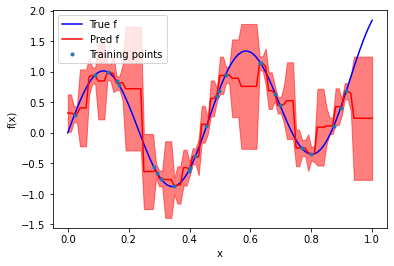

In [8]:
fig, ax = plt.subplots(1,1)
plt.plot(xlin, f(xlin), color='b',label="True f")
ax.plot(test_x, means, color='r',label="Pred f")
lower = means-1.96*std
upper = means+1.96*std
ax.fill_between(test_x.view(-1).numpy(), lower.numpy(), upper.numpy(), alpha=0.5, color='r')

ax.plot(train_x.view(-1), train_y, '.', label="Training points")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()

In [9]:
# Experiments! -- population of GPs
# They are randomly initialized, and the most promising are kept and trained
n_gps = 8
gp_pop = GPPopulation(train_x.to(device=device, dtype=torch.float64),
                      train_y.to(device=device, dtype=torch.float64),
                      test_x.to(device=device, dtype=torch.float64),
                      pop_size=n_gps, lambd=0.00001)
n_times = 5
for _ in range(8):
    gp_pop.improve_all(n_times=n_times)
    gp_pop.cull_bottom(quantile=0.25)
    gp_pop.get_nlls()
    print(gp_pop.nlls)
    n_times = int(n_times * 4 / 3)
    for gp in gp_pop.gps:
        gp.save()
    for _ in range(50):
        print(".")

# The promising gps are in stored gp_pop.gps, and the rejects are stored in gp.rejects

[0.30906421 0.30911534 0.30917275 0.30924758 0.3093351  0.30946404]
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
[0.30901426 0.30905753 0.30910322 0.30916173 0.30922872]
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
[0.30895942 0.30899527 0.30903004 0.30907474]
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
[0.30889887 0.30893328 0.30895942]
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
[0.30881902 0.30884964 0.30887773]
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
[0.30874167 0.30876231 0.30878912]
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
[0.30865971 0.30868042 0.30869535]
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

In [10]:
# Experiments! -- kernel = weighted mixture of kernels
gp_pop.process_all()
gp_pop.get_nlls()
ksum = KernelSumGP(gp_pop)

ksum.get_preconditioner_brute(rank=50, n_iter=15)
ksum.small_eigvec_precon()
ksum.calculate_woodbury(tol=1.)
ksum.rmse(targets=test_y_cuda)

tensor([6.8692e+00, 1.0024e+00, 1.3718e+00, 9.4273e-01, 6.1776e-01, 1.1066e+00,
        3.8623e-01, 2.8355e-01, 7.2905e-01, 4.2206e-01, 1.1347e-01, 1.7761e-01,
        1.2643e-01, 1.6919e-01, 1.2889e-01, 1.5773e-01, 8.6862e-02, 4.8481e-02,
        3.9567e-02, 1.6267e-02, 8.5013e-03, 8.5773e-03, 1.4232e-02, 4.4240e-03,
        4.8714e-03], device='cuda:6', dtype=torch.float64)
tensor([7.4420e+00, 2.5995e+00, 1.8618e+00, 2.8047e+00, 1.9006e+00, 1.0441e+00,
        1.0334e+00, 4.9727e-01, 6.4883e-01, 4.8630e-01, 3.1008e-01, 2.4742e-01,
        1.2889e-01, 7.3203e-02, 8.0862e-02, 1.3859e-01, 6.3548e-02, 5.9912e-02,
        7.1987e-02, 1.1758e-02, 2.7094e-03, 2.6853e-03, 2.9860e-03, 2.4314e-03,
        2.4277e-03], device='cuda:6', dtype=torch.float64)
tensor([7.7492e+00, 3.0169e+00, 2.9376e+00, 2.3633e+00, 2.5892e+00, 9.8089e-01,
        8.2628e-01, 6.4635e-01, 5.1977e-01, 3.7774e-01, 3.2204e-01, 2.8925e-01,
        1.2702e-01, 1.3199e-01, 6.6479e-02, 6.9103e-02, 7.2026e-02, 6.0960e-02,
  

tensor(0.3863, device='cuda:6', dtype=torch.float64)